In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data
base_dir = "./Datasets"

df = pd.read_csv(f"{base_dir}/population_data.csv")

print("Step 1: Reading data...")
print(f"Total rows: {len(df)}")

Step 1: Reading data...
Total rows: 2469


In [3]:
melbourne_data = df[
    (df['Unnamed: 1'] == 'Victoria') & 
    (df['Unnamed: 3'] == 'Greater Melbourne')
].copy()
print(f"Melbourne records found: {len(melbourne_data)}")

Melbourne records found: 361


In [7]:
years = list(range(2001, 2022))  # 2001 to 2021
population_columns = [f'Unnamed: {i}' for i in range(10, 31)]  # Unnamed: 10 to Unnamed: 30


In [8]:
melbourne_totals = []
for i, col in enumerate(population_columns):
    if col in melbourne_data.columns:
        # Convert to numeric first, then sum
        numeric_col = pd.to_numeric(melbourne_data[col], errors='coerce')
        total = numeric_col.sum()
        melbourne_totals.append(total)
        print(f"{years[i]}: {total:,.0f}")  # Show each year as we calculate
    else:
        melbourne_totals.append(0)

2001: 3,500,249
2002: 3,545,579
2003: 3,594,031
2004: 3,641,951
2005: 3,697,372
2006: 3,760,760
2007: 3,841,760
2008: 3,931,438
2009: 4,031,787
2010: 4,105,857
2011: 4,169,366
2012: 4,265,843
2013: 4,370,067
2014: 4,476,030
2015: 4,586,012
2016: 4,714,387
2017: 4,818,100
2018: 4,913,138
2019: 5,001,917
2020: 5,054,839
2021: 4,976,157


In [9]:
# Create the trend data
trend_data = pd.DataFrame({
    'Year': years,
    'Population': melbourne_totals
})

print(f"\nMelbourne Population Growth:")
print(f"2001: {trend_data['Population'].iloc[0]:,.0f}")
print(f"2021: {trend_data['Population'].iloc[-1]:,.0f}")
print(f"Total Growth: {trend_data['Population'].iloc[-1] - trend_data['Population'].iloc[0]:,.0f}")



Melbourne Population Growth:
2001: 3,500,249
2021: 4,976,157
Total Growth: 1,475,908


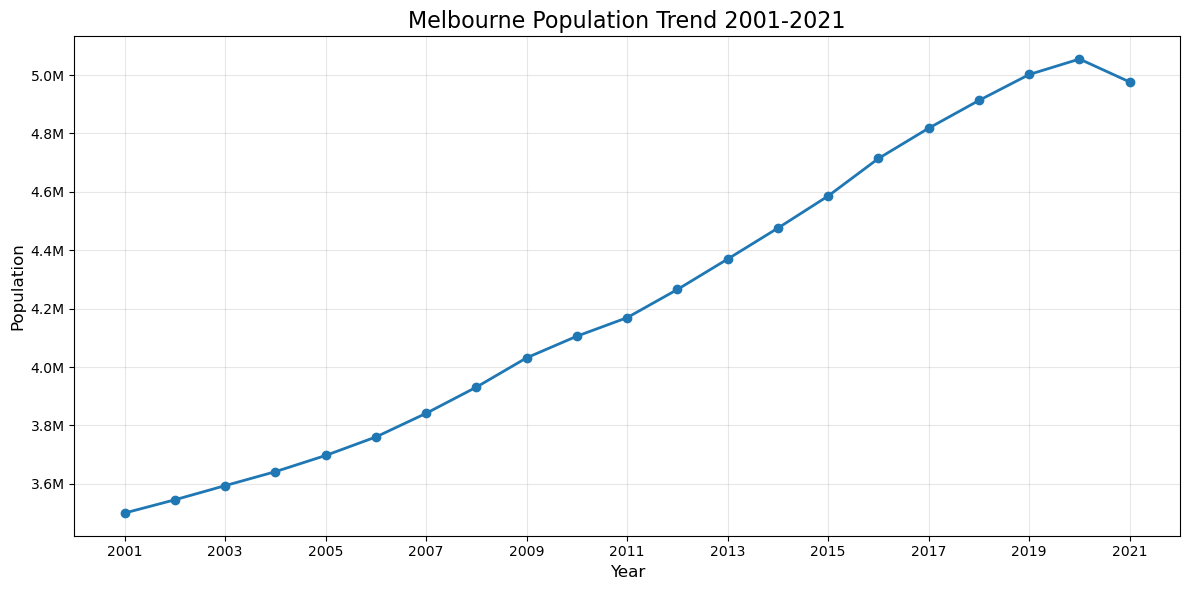

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(trend_data['Year'], trend_data['Population'], marker='o', linewidth=2, markersize=6)
plt.title('Melbourne Population Trend 2001-2021', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(2001, 2022, 2))  # Show every 2nd year
plt.ticklabel_format(style='plain', axis='y')  # No scientific notation
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))

plt.tight_layout()
plt.show()


In [14]:
trend_data.to_csv('melbourne_population_trend.csv', index=False)